In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/daybikedataset/day.csv


In [3]:
file = open("/kaggle/input/daybikedataset/day.csv", "rb")
# file = open("/kaggle/input/d/vedika27agarwal/daybikedataset/day.csv", "rb")

data_r = file.readlines()

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data_arr = np.genfromtxt('/kaggle/input/daybikedataset/day.csv', delimiter=',', dtype=np.float64, skip_header=1)
# data_arr = np.genfromtxt('/kaggle/input/d/vedika27agarwal/daybikedataset/day.csv', delimiter=',', dtype=np.float64, skip_header=1)
data_arr = data_arr[:, 10:12]*100

In [5]:
print(data_arr.shape)

(731, 2)


In [6]:
print(data_arr)

[[36.3625 80.5833]
 [35.3739 69.6087]
 [18.9405 43.7273]
 ...
 [24.24   75.2917]
 [23.17   48.3333]
 [22.3487 57.75  ]]


In [7]:
data_arr = data_arr.astype(int)
print(data_arr)

[[36 80]
 [35 69]
 [18 43]
 ...
 [24 75]
 [23 48]
 [22 57]]


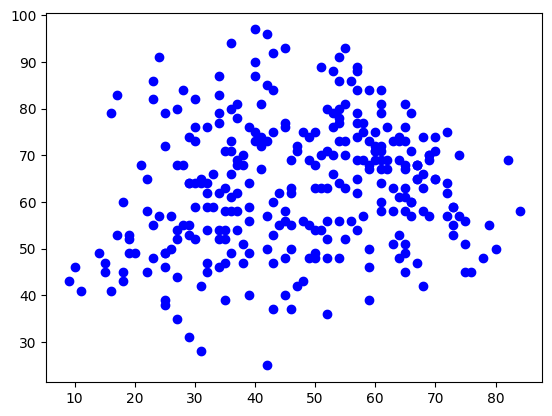

In [8]:
import random

random_seed = 6
data_freq = 300
# data = data_arr[:data_freq, :]
random.seed(random_seed)
indices = random.sample(range(data_arr.shape[0]), data_freq)

data = data_arr[indices, :]

plt.plot(data[:, 0], data[:, 1], marker='o', linestyle=' ', color='blue', label='Bike Data')

In [9]:
def _1flat(p1, p2):
    '''
    Returns the m, c values from the eqn y = mx + c, which is the eqn of the line formed by joining points p1 and p2
    If p1 == p2, we return line with slope 1
    If p1_x == p2_x, m = None and c = x_intercept
    Otherwise, m = slope and c = y_intercept
    '''
    
    if (p2[0] == p1[0]):
        if (p2[1] == p1[1]):
            return 1, p1[1] - p1[0]
        
        return None, p1[0]
    
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    c = round(p1[1] - m*p1[0], 2)
    
    return round(m, 2), c

In [10]:
import math

def find_dist(pt, line):
    if line[0] == None:
        return math.fabs(pt[0] - line[1])
    
    numerator = math.fabs(line[0]*pt[0] - pt[1] + line[1])
    denominator = math.sqrt(1 + line[0]**2)
    
    return round(numerator/denominator, 7)

def find_min_dist(pt, F):
    F = list(F)
    min_dist = find_dist(pt, F[0])
    for line in F[1:]:
        cur_dist = find_dist(pt, line)
        min_dist = min(min_dist, cur_dist)
    
    return min_dist

In [11]:
import heapq

def Approx_k_j_Flats(P, C, k=2, j=1):
#     C = 25
    
    t = 1
    Q = P
    F = set()
    
    while Q.shape[0] >= C*k*(j+1):
#         S_len = int(np.log2((j+1)) + min(t, np.log2(np.log2(data_freq))))
        S_len = 1
#         random.seed(7*t-1) # 1, 3, 5
        indx_S0 = random.sample(range(Q.shape[0]), S_len)
#         random.seed(7*t)   # 2, 4, 6
        indx_S1 = random.sample(range(Q.shape[0]), S_len)
        
        F_ = set()
        for i in range(S_len):
            for j in range(S_len):
                F_.add(_1flat(Q[indx_S0[i]], Q[indx_S1[j]]))
        
        F.update(F_)
        
        min_dist_rec = [] # Contains lists [dist, indx] as elements where dist = min distance of Q[indx] from closest line
        Q_index = 0
        for pt in Q:
            min_dist_rec.append((-1*find_min_dist(pt, F_), Q_index))
            Q_index += 1
        
        heapq.heapify(min_dist_rec)
        
        Q_ = []
        for i in range(Q.shape[0]//2):
            Q_.append(Q[heapq.heappop(min_dist_rec)[1]])
        
        Q = np.array(Q_)
        t += 1
    
    for pt1 in Q:
        for pt2 in Q:
            F.add(_1flat(pt1, pt2))
    
    return Q, F.copy()

In [12]:
# test

C = 1

k=2
j=1
t = 1
Q = data
F = set()

S_len = int(2 + np.log2(k*(j+1)) + min(t, np.log2(np.log2(data_freq))))
indx_S0 = random.sample(range(Q.shape[0]), S_len)
indx_S1 = random.sample(range(Q.shape[0]), S_len)

F_ = set()
for i in range(S_len):
    for j in range(S_len):
        F_.add(_1flat(Q[indx_S0[i]], Q[indx_S1[j]]))



In [13]:
def plotPoint(P, clr):
    plt.plot(P[:, 0], P[:, 1], marker='o', linestyle=' ', color=clr)
    
def plotLine(m, c, clr):
    if m==None:
        x1, y1, x2, y2 = c, 0, c, 100
    elif m==0:
        x1, y1, x2, y2 = 0, c, 100, c
    else:
        x1, y1, x2, y2 = 0, c, -c/m, 0
    if x2!=x1:
        x = np.linspace(min(x1, x2) - 100, max(x1, x2) + 100, 100)        
        y = m * (x - x1) + y1
        plt.plot(x, y, linestyle='-', color=clr)
    else:
        plt.plot([x1, y1], [x2, y2], linestyle='-', color=clr)

In [14]:
def find_k_j_flats(data, C):
    Q_2, F_2 = Approx_k_j_Flats(data, C)
    F_2 = list(F_2)

#     plotPoint(Q_2, 'red')
#     for line in F_2:
#         plotLine(line[0], line[1])
    
#     plotPoint(Q_2, 'red')

#     data_view = data.view([('', data.dtype)] * data.shape[1])
#     Q_2_view = Q_2.view([('', Q_2.dtype)] * Q_2.shape[1])

#     Q_3 = np.setdiff1d(data_view, Q_2_view).view(data.dtype).reshape(-1, data.shape[1])

#     plotPoint(Q_3, 'blue')
#     plt.xlim(-25, 100)
#     plt.ylim(-25, 125)
#     plt.show()
    
    return F_2

In [15]:
def find_optimal_l_centrum(F, l, P):
    flag = True
    optimalLine = None
    optimalDistances = []
    closestDistances = []
    first_line_flag = True
    
    for line in F:
        distances = []
        for pt in range(len(P)):
            d = find_dist(P[pt], line)
            distances.append(d)
            
            if first_line_flag:
                closestDistances.append(d)
            else:
                closestDistances[pt] = min(closestDistances[pt], d)
        
        first_line_flag = False
        distances.sort(reverse=True)
        
        max_l_sum = sum(distances[:l])
        
        if flag:
            optimalDistance = max_l_sum
            flag = False
            
        optimalDistance = min(optimalDistance, max_l_sum)
        
        if optimalDistance == max_l_sum:
            optimalLine = line
            optimalDistances = distances
            
    closestDistances.sort(reverse=True)
    return optimalLine, optimalDistances, closestDistances

In [16]:
def find_optimal_dist_sum(data, l, F):
    L_1, D_1, D_n = find_optimal_l_centrum(F, l, data)
    optimal_max_l_dist_sum  = sum(D_1[:l])
    optimal_closest_l_dist_sum = sum(D_n[:l])

#     plotPoint(data, 'red')
#     plotLine(L_1[0], L_1[1])

#     plt.xlim(-25, 100)
#     plt.ylim(-25, 125)
#     plt.show()

    return optimal_closest_l_dist_sum, optimal_max_l_dist_sum, L_1

In [17]:
%%time

min_dist_overall_rec = []
closest_dist_overall_rec = []

for iter in range(500):
    print(iter)
    min_dist_sum = [-1, -1, -1]
    optimal_line = [None, None, None]
    optimal_C = [0, 0, 0]
    ell_values = [1, data.shape[0]//2, data.shape[0]]
    min_dist_rec = [[], [], []]
    closest_dist_rec = [[], [], []]

    for i in range(1, 15):
        F = find_k_j_flats(data, i)
        for l in range(3):
            cur_closest_sum, cur_dist_sum, cur_line = find_optimal_dist_sum(data, ell_values[l], F)
            if i == 5 or cur_dist_sum < min_dist_sum[l]:
                min_dist_sum[l] = cur_dist_sum
                optimal_line[l] = cur_line
                optimal_C[l] = i
            
            closest_dist_rec[l].append(cur_closest_sum)
            min_dist_rec[l].append(cur_dist_sum)
    
    closest_dist_overall_rec.append(closest_dist_rec)
    min_dist_overall_rec.append(min_dist_rec)
    
#     for l in range(3):
#         plt.subplot(3, 1, l + 1)
#         plt.plot(range(1, 15), min_dist_rec[l])
#         plt.plot([11], [min_dist_rec[l][10]], marker='o', linestyle=" ", color="red")
#         plt.title("ell = " + str(ell_values[l]))
#         plt.xlabel("Values of C")
#         if l==1:
#             plt.ylabel("Sum of 'ell' max distances")
    #     plt.ylim(0, None)

#     plt.show()

min_dist_overall_rec = np.array(min_dist_overall_rec)
closest_dist_overall_rec = np.array(closest_dist_overall_rec)
mean_min_dist = [[], [], []]
mean_closest_dist = [[], [], []]
for i in range(1, 15):
    mean_min_dist[0].append(np.mean(min_dist_overall_rec[:, 0, i-1]))
    mean_min_dist[1].append(np.mean(min_dist_overall_rec[:, 1, i-1]))
    mean_min_dist[2].append(np.mean(min_dist_overall_rec[:, 2, i-1]))
    mean_closest_dist[0].append(np.mean(closest_dist_overall_rec[:, 0, i-1]))
    mean_closest_dist[1].append(np.mean(closest_dist_overall_rec[:, 1, i-1]))
    mean_closest_dist[2].append(np.mean(closest_dist_overall_rec[:, 2, i-1]))

# print("ell = " + str(ell_values[0]) + ": Optimal C = " + str(np.argmin(np.array(mean_dist[0])) + 1))
# print("ell = " + str(ell_values[1]) + ": Optimal C = " + str(np.argmin(np.array(mean_dist[1])) + 1))
# print("ell = " + str(ell_values[2]) + ": Optimal C = " + str(np.argmin(np.array(mean_dist[2])) + 1))

# for l in range(3):
#     plt.subplot(3, 1, l + 1)
#     plt.plot(range(1, 15), mean_dist[l])
#     plt.plot([11], [mean_dist[l][10]], marker='o', linestyle=" ", color="red")
#     plt.title("ell = " + str(ell_values[l]))
#     plt.xlabel("Values of C")
#     if l==1:
#         plt.ylabel("Mean Sum of 'ell' max distances")

# plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

ell = 1: Optimal C = 14
ell = 150: Optimal C = 10
ell = 300: Optimal C = 10


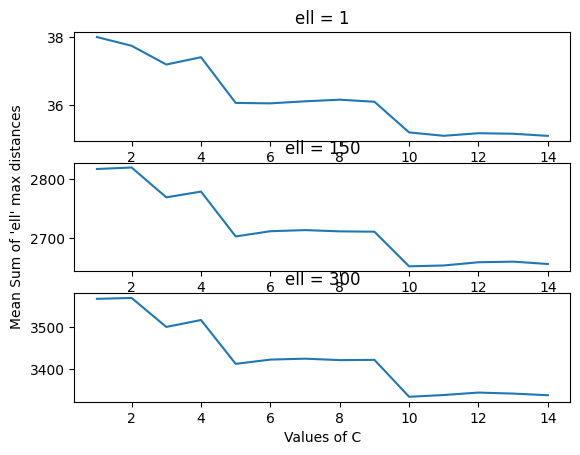

In [18]:
print("ell = " + str(ell_values[0]) + ": Optimal C = " + str(np.argmin(np.array(mean_min_dist[0])) + 1))
print("ell = " + str(ell_values[1]) + ": Optimal C = " + str(np.argmin(np.array(mean_min_dist[1])) + 1))
print("ell = " + str(ell_values[2]) + ": Optimal C = " + str(np.argmin(np.array(mean_min_dist[2])) + 1))

for l in range(3):
    plt.subplot(3, 1, l + 1)
    plt.plot(range(1, 15), mean_min_dist[l])
    plt.title("ell = " + str(ell_values[l]))
    plt.xlabel("Values of C")
    if l==1:
        plt.ylabel("Mean Sum of 'ell' max distances")

plt.show()

ell = 1: Optimal C = 13
ell = 150: Optimal C = 13
ell = 300: Optimal C = 13


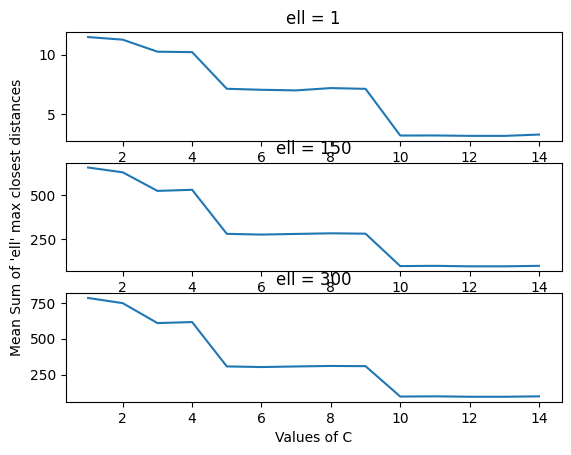

In [19]:
print("ell = " + str(ell_values[0]) + ": Optimal C = " + str(np.argmin(np.array(mean_closest_dist[0])) + 1))
print("ell = " + str(ell_values[1]) + ": Optimal C = " + str(np.argmin(np.array(mean_closest_dist[1])) + 1))
print("ell = " + str(ell_values[2]) + ": Optimal C = " + str(np.argmin(np.array(mean_closest_dist[2])) + 1))

for l in range(3):
    plt.subplot(3, 1, l + 1)
    plt.plot(range(1, 15), mean_closest_dist[l])
    plt.title("ell = " + str(ell_values[l]))
    plt.xlabel("Values of C")
    if l==1:
        plt.ylabel("Mean Sum of 'ell' max closest distances")

plt.show()

1 9
2 10
3 16
4 12
5 50
6 48
7 50
8 50
9 46
10 165
11 165
12 171
13 168
14 144


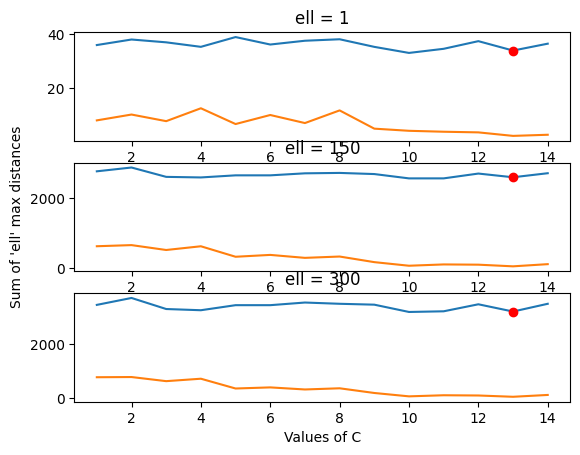

In [20]:
min_dist_sum = [-1, -1, -1]
line_C_13 = [None, None, None]
optimal_C = [0, 0, 0]
ell_values = [1, data.shape[0]//2, data.shape[0]]
min_dist_rec = [[], [], []]
closest_dist_rec = [[], [], []]
line_C_13 = [None, None, None]
F_len_rec = []

for i in range(1, 15):
    F = find_k_j_flats(data, i)
    print(i, len(F))
    F_len_rec.append(len(F))
    for l in range(3):
        closest_dist_sum, cur_dist_sum, cur_line = find_optimal_dist_sum(data, ell_values[l], F)
        min_dist_rec[l].append(cur_dist_sum)
        closest_dist_rec[l].append(closest_dist_sum)
        
        if i == 5 or cur_dist_sum < min_dist_sum[l]:
            min_dist_sum[l] = cur_dist_sum
            optimal_line[l] = cur_line
            optimal_C[l] = i
        
        if i == 13:
            line_C_13[l] = cur_line

for l in range(3):
    plt.subplot(3, 1, l + 1)
    plt.plot(range(1, 15), min_dist_rec[l])
    plt.plot(range(1, 15), closest_dist_rec[l])
    plt.plot([13], [min_dist_rec[l][12]], marker='o', linestyle=" ", color="red")
    plt.title("ell = " + str(ell_values[l]))
    plt.xlabel("Values of C")
    if l==1:
        plt.ylabel("Sum of 'ell' max distances")
#     plt.ylim(0, None)

plt.show()

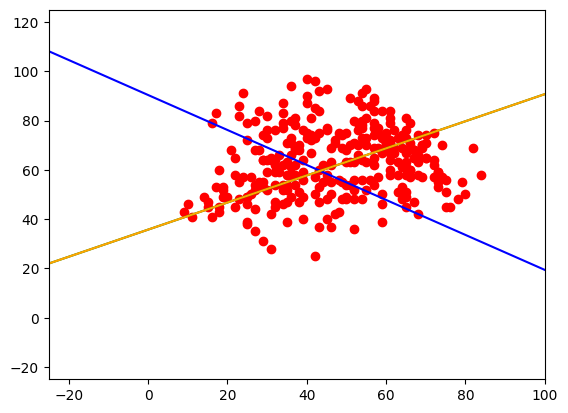

In [21]:
plotPoint(data, "red")
plotLine(line_C_13[0][0], line_C_13[0][1], clr="blue")
plotLine(line_C_13[1][0], line_C_13[1][1], clr="green")
plotLine(line_C_13[2][0], line_C_13[2][1], clr="orange")
plt.xlim(-25, 100)
plt.ylim(-25, 125)

plt.show()

In [22]:
import pandas as pd

data_lines = {
    'C': range(1,15),
    'No. of Lines':F_len_rec
}

df_lines = pd.DataFrame(data_lines).T

print(df_lines)

              0   1   2   3   4   5   6   7   8    9    10   11   12   13
C              1   2   3   4   5   6   7   8   9   10   11   12   13   14
No. of Lines   9  10  16  12  50  48  50  50  46  165  165  171  168  144


In [23]:
data_l_1 = {
    'C' : range(1, 15),
    'All of F': mean_closest_dist[0],
    '1 Optimal Line from F': mean_min_dist[0]
}

df_1 = pd.DataFrame(data_l_1)

print("ell =", ell_values[0])
print()
print(df_1)

ell = 1

     C   All of F  1 Optimal Line from F
0    1  11.467835              37.997014
1    2  11.249687              37.740223
2    3  10.242134              37.189093
3    4  10.205636              37.403657
4    5   7.132627              36.059716
5    6   7.047814              36.047117
6    7   6.997966              36.107197
7    8   7.190215              36.154628
8    9   7.127943              36.093922
9   10   3.213986              35.191968
10  11   3.218450              35.092373
11  12   3.185711              35.168411
12  13   3.183479              35.152977
13  14   3.294492              35.089879


In [24]:
import pandas as pd

# mean_min_dist = np.array(mean_min_dist)
# mean_closest_dist = np.array(mean_closest_dist)

data_l_half = {
    'C' : range(1, 15),
    'All of F': mean_closest_dist[1],
    '1 Optimal Line from F': mean_min_dist[1]
}

df_half = pd.DataFrame(data_l_half)

print("ell =", ell_values[1])
print()
print(df_half)

ell = 150

     C    All of F  1 Optimal Line from F
0    1  657.877282            2817.640258
1    2  630.338411            2820.173197
2    3  524.114321            2769.160605
3    4  530.344596            2779.023187
4    5  278.326511            2702.361109
5    6  274.089263            2711.266230
6    7  277.855941            2713.171375
7    8  281.329089            2711.050915
8    9  279.204714            2710.443406
9   10   93.757535            2651.250312
10  11   95.240932            2652.718941
11  12   92.465330            2658.232885
12  13   92.385323            2659.257940
13  14   95.162331            2655.268846


In [25]:
import pandas as pd

# mean_min_dist = np.array(mean_min_dist)
# mean_closest_dist = np.array(mean_closest_dist)

data_l_full = {
    'C' : range(1, 15),
    'All of F': mean_closest_dist[2],
    '1 Optimal Line from F': mean_min_dist[2]
}

df_full = pd.DataFrame(data_l_full)

print("ell =", ell_values[2])
print()
print(df_full)

ell = 300

     C    All of F  1 Optimal Line from F
0    1  784.520092            3566.602533
1    2  748.178722            3568.689372
2    3  609.309792            3499.682304
3    4  616.385020            3516.163556
4    5  306.993319            3411.791927
5    6  302.620920            3421.957377
6    7  306.790158            3424.137580
7    8  310.266421            3420.732275
8    9  308.768326            3421.330550
9   10   96.835205            3333.433790
10  11   98.357652            3337.624352
11  12   95.419684            3343.486810
12  13   95.247190            3341.018636
13  14   98.249202            3337.174336
